In [67]:
import time
time.localtime()

time.struct_time(tm_year=2018, tm_mon=7, tm_mday=9, tm_hour=14, tm_min=7, tm_sec=42, tm_wday=0, tm_yday=190, tm_isdst=0)

In [68]:
import pymysql

In [69]:
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv') ][1:]

In [70]:
p= [int(line[4]) for line in I020 if int(line[0])>8590000 and int(line[0])<9000000]
q= [int(line[6]) for line in I020 if int(line[0])>8590000 and int(line[0])<9000000]

In [71]:
print(p[0],p[-1],min(p),max(p),q[-1]-q[0])

10309 10312 10308 10313 905


In [72]:
def TimetoNumber(time):
    time=time.zfill(8)
    sec=int(time[:2])*360000+int(time[2:4])*6000+int(time[4:6])*100+int(time[6:8])
    return sec

MAarray = []
MA = []
MAValue = 0
STime = TimetoNumber('08450000')
Cycle = 6000
MAlen = 10

for i in I020:
    #print(i)
    time = i[0]
    price = int(i[4])
    if len(MAarray)==0:
        MAarray+=[price]
    else:
        if TimetoNumber(time)<STime+Cycle:
            MAarray[-1]=price
        else:
            if len(MAarray)==MAlen:
                MAarray=MAarray[1:]+[price]
            else:
                MAarray+=[price]
            STime = STime+Cycle
    MAValue=float(sum(MAarray))/len(MAarray)
    MA.extend([[time,MAValue]])

print(time,MAValue)

13450006 10307.2


In [73]:
import pandas as pd
ma=pd.DataFrame(MA)

In [75]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

In [76]:
Time = [datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020]
Time1 = [ mdates.date2num(line) for line in Time ]
Price = [ int(line[4]) for line in I020]

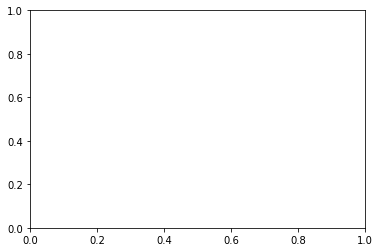

In [77]:
ax = plt.figure(1)
ax = plt.subplot(111)

In [78]:
#fig,ax=plt.subplots()

In [79]:
ax.plot_date(Time1, Price, 'k-')

Text(0.5,1,'Price Line')

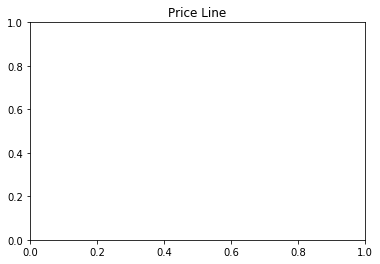

In [80]:
plt.title('Price Line')

In [81]:
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

In [82]:
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

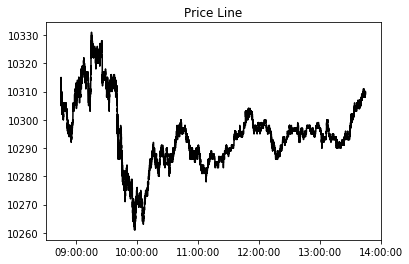

In [83]:
Time = [datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020]
Time1 = [ mdates.date2num(line) for line in Time ]
Price = [ int(line[4]) for line in I020]
ax = plt.figure(1)
ax = plt.subplot(111)
ax.plot_date(Time1, Price, 'k-')
plt.title('Price Line')
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)
plt.show

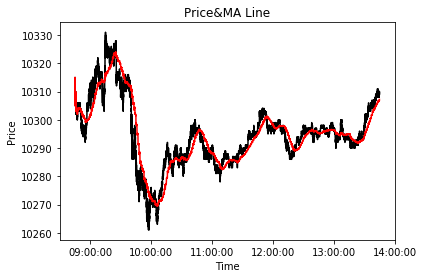

In [85]:
# -*- coding: UTF-8 -*-

#載入相關套件及函數
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

#時間轉數值函數
def TimetoNumber(time):
 time=time.zfill(8)
 sec=int(time[:2])*360000+int(time[2:4])*6000+int(time[4:6])*100+int(time[6:8])
 return sec

#載入成交資訊
I020 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I020.csv')][1:]

#定義MA相關變數
MAarray = []
MA = []
MAValue = 0
STime = TimetoNumber('08450000')
Cycle = 6000
MAlen = 10

#開始進行MA計算
for i in I020:
 time=i[0]
 price=int(i[4])
 if len(MAarray)==0:
  MAarray+=[price]
 else:
  if TimetoNumber(time)<STime+Cycle:
   MAarray[-1]=price
  else:
   if len(MAarray)==MAlen:
    MAarray=MAarray[1:]+[price]
   else:
    MAarray+=[price]   
   STime = STime+Cycle
 MAValue=float(sum(MAarray))/len(MAarray)
 MA.extend([MAValue])

#取得轉換時間字串至時間格式
Time = [ datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020 ]
#將datetime時間格式轉換為繪圖專用的時間格式，透過mdates.date2num函數
Time1 = [ mdates.date2num(line) for line in Time ]
#價格由字串轉數值
Price = [ int(line[4]) for line in I020 ]

#定義圖表物件
ax = plt.figure(1) 		#第一張圖片              
ax = plt.subplot(111)	#該張圖片僅一個圖案
#以上兩行，可簡寫如下一行
#fig,ax = plt.subplots()

#定義title
plt.title('Price&MA Line')
plt.xlabel('Time')
plt.ylabel('Price')

# 繪製價格折線圖
ax.plot_date(Time1, Price, 'k-')
# 繪製MA折線圖
ax.plot_date(Time1, MA, 'r-')

#定義x軸
hfmt = mdates.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(hfmt)

# 顯示繪製圖表
plt.show()



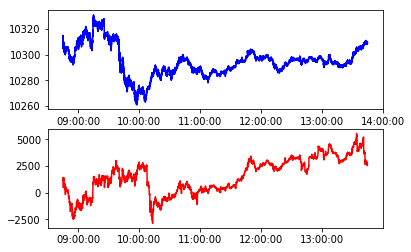

In [89]:
MTime = [datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020]
MTime1 = [ mdates.date2num(line) for line in MTime]
fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.plot_date(MTime1, Price, 'b-')
I030 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I030.csv')][1:]
I030 = [ line for line in I030 if int(line[0]) > 8450000]
OTime = [datetime.datetime.strptime(line[0], "%H%M%S%f") for line in I030]
Otime1 = [mdates.date2num(line) for line in OTime]
Amount = [ int(line[3])-int(line[5]) for line in I030]
ax2 = fig.add_subplot(212)
ax2.plot_date(OTime, Amount, 'r-')

hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)
plt.show()

In [ ]:
MTime = [datetime.datetime.strptime(line[0],"%H%M%S%f") for line in I020]
MTime1 = [ mdates.date2num(line) for line in MTime]
fig = plt.figure(1)
ax1 = fig.add_subplot(211)
ax1.plot_date(MTime1, Price, 'b-')
I030 = [ line.strip('\n').split(",") for line in open('/Users/kevin/Downloads/TickData/Futures_20170815_I030.csv')][1:]
I030 = [ line for line in I030 if int(line[0]) > 8450000]
OTime = [datetime.datetime.strptime(line[0], "%H%M%S%f") for line in I030]
Otime1 = [mdates.date2num(line) for line in OTime]
BRatio = [float(line[3])/int(line[2]) for line in I030]
SRatio = [float(line[5])/int(line[4]) for line in I030]
Amount = [ int(line[3])-int(line[5]) for line in I030]
ax2 = fig.add_subplot(212)
ax2.plot_date(OTime1, Amount, 'r-')

hfmt = mdates.DateFormatter('%H:%M:%S')
ax1.xaxis.set_major_formatter(hfmt)
ax2.xaxis.set_major_formatter(hfmt)
plt.show()